## Linki

https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

## Opis cech (features)

### Lista występujących cech w danych:

##### 1. class  _klasa_:
- edible = e    > _jadalne_
- poisonous = p > _trujące_

##### 2. cap-shape  _kształt kapelusza_:
- bell = b      > _dzwon_
- conical = c   > _stożkowy_
- convex = x    > _wypukły_
- flat = f      > _płaski_
- knobbed = k   > _gałkowy_
- sunken = s    > _wklęsły_

##### 3. cap-surface  _powierzchnia kapelusza_:
- fibrous = f   > _włóknista_
- grooves = g   > _rowkowata_
- scaly = y     > _łuskowata_
- smooth = s    > _gładka_

##### 3. cap-color _kolor kapelusza_:
- brown = n     > _brązowy_
- buff = b      > _jasnobrązowożółty_
- cinnamon = c  > _cynamon_
- gray = g      > _szary_
- green = r     > _zielony_
- pink = p      > _różowy_
- purple = u    > _fioletowy_
- red = e       > _czerwony_
- white = w     > _biały_
- yellow = y    > _zółty_

##### 4. bruises _bruzdy_:
- bruises = t   > _prawda_
- no = f        > _fałsz_

##### 5. odor _zapach_:
- almond=a > _migdałowy_
- anise=l >_anyżowy_
- creoote=c >_kreotyzowy_
- fishy=y >_rybi_
- foul=f >_śmierdzący_
- musty=m >_stęchły_
- none=n 
- pungent=p >_cierpki_
- spicy=s > _pikantny_

##### 6. gill-attachment _blaszki:
- attached=a
- descending=d
- free=f
- notched=n

##### 7. gill-spacing _odstępy blaszek_:
- close=c
- crowded=w
- distant=d

##### 8. gill-size _rozmiar blaszek_:
- broad=b
- narrow=n

##### 9. gill-color _kolor blaszek_:
- black=k
- brown=n
- buff=b
- chocolate=h
- gray=g
- green=r
- orange=o
- pink=p
- purple=u
- red=e
- white=w
- yellow=y

##### 10. stalk-shape _trzon_:
- enlarging=e
- tapering=t

##### 11. stalk-root _korzeń trzonu_:
- bulbous=b
- club=c
- cup=u
- equal=e
- rhizomorphs=z
- rooted=r
- missing=?

##### 12. stalk-surface-above-ring _powierzchnia trzonu powyżej pierścienia_:
- fibrous=f > _włóknista_
- scaly=y > _łuskowata_
- silky=k > _jedwabista_
- smooth=s > _gładka_

##### 13. stalk-surface-below-ring _powierzchnia trzonu poniżej pierścienia_:
- fibrous=f
- scaly=y
- silky=k
- smooth=s

##### 14. stalk-color-above-ring _kolor trzonu powyżej pierścienia_:
- brown=n
- buff=b
- cinnamon=c
- gray=g
- orange=o
- pink=p
- red=e
- white=w
- yellow=y

##### 15. stalk-color-below-ring _kolor trzonu poniżej pierścienia_:
- brown=n
- buff=b
- cinnamon=c
- gray=g
- orange=o
- pink=p
- red=e
- white=w
- yellow=y

##### 16. veil-type _typ welonu_:
- parial=p
- universal=u

##### 17. veil-color _kolor welonu_:
- brown=n,
- orange=o
- white=w
- yellow=y

##### 18. ring-number _ilość pierścieni_:
- none=none=o,two=t

##### 19. ring-type _rodzaj pierścienia_:
- cobwebby=c
- evanescent=e
- flaring=f
- large=l
- none=n
- pendant=p
- sheathing=s
- zone=z

##### 20. spore-print-color _kolor zarodników_:
- black=k
- brown=n
- buff=b
- chocolate=h
- green=r
- orange=o
- purple=u
- white=w
- yellow=y

##### 21. population _populacja_:
- abundant=a
- clustered=c
- numerous=n
- scattered=s
- several=v
- solitary=y

##### 22. habitat _środowisko występowania_:
- grasses=g
- leaves=l
- meadows=m
- paths=p
- urban=u
- waste=w
- woods=d

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from mlxtend import plotting
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix

In [52]:
df = pd.read_csv('mushrooms.csv')
df_columns = pd.read_csv('mushrooms.csv')

In [53]:
# domyślnie podaje 5 wierszy
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [54]:
# object Dtype = string
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [55]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [56]:
# Liczebność grzybór jadalnych (e) i trujących (p):
jadalne = df["class"].value_counts()["e"]
trujace = df["class"].value_counts()["p"]
print(f"Liczba grzybów jadalnych: {jadalne}, trujących: {trujace}.")

Liczba grzybów jadalnych: 4208, trujących: 3916.


In [57]:
#sprawdzenie duplikatów
df.duplicated().any()

False

In [58]:
# Sprawdzenie brakujących wartości
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [59]:
# Sprawdzenie wartości NaN
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [60]:
#zamiana danych na OHE, wywalamy class p - to będzie nasz target (class_e)
df = pd.get_dummies(df)
df = df.drop(["class_p"], axis=1)

In [61]:
y = df.class_e
x = df.drop(["class_e"], axis=1)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [63]:
rf_classifier = RandomForestClassifier(n_estimators = 5, criterion = 'gini', max_depth=5, bootstrap=True, random_state=1)

rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=5, random_state=1)

In [64]:
rf_classifier.score(X_test, y_test)

0.9950769230769231

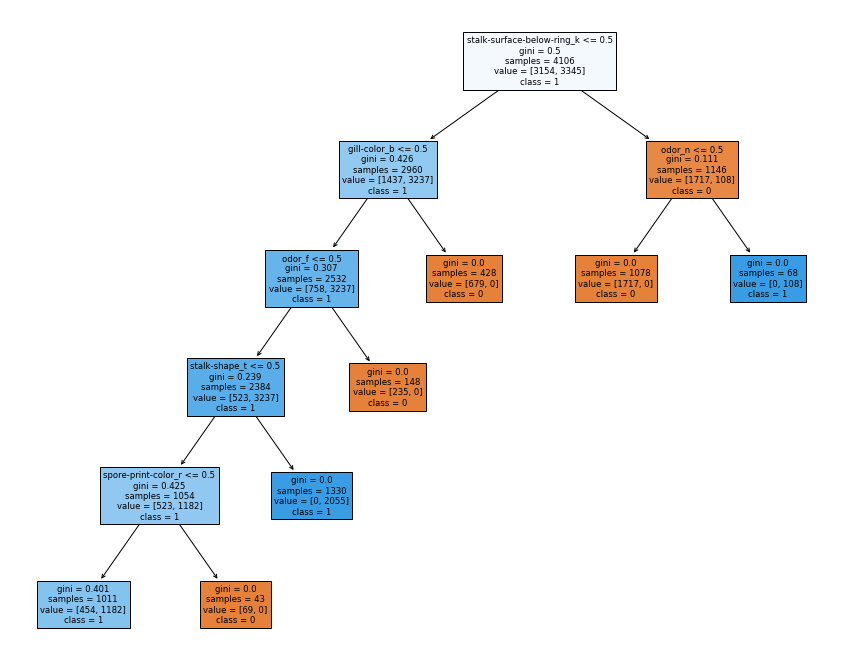

In [65]:
plt.figure(figsize = (15,12))

plot_tree(rf_classifier.estimators_[0],
        feature_names=x.columns,
        class_names=["0","1"],
        filled=True);

In [66]:
feature_importances = pd.DataFrame(rf_classifier.feature_importances_, index=x.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)



In [67]:
most_important_features = feature_importances[feature_importances["importance"] > 0]
len(most_important_features)

41

In [68]:
feature_importances[feature_importances["importance"] > 0]

,importance
stalk-surface-below-ring_k,0.166113
odor_n,0.157838
gill-color_b,0.093064
bruises_f,0.083805
habitat_g,0.063340
odor_f,0.056042
stalk-surface-below-ring_s,0.040602
spore-print-color_w,0.032517
ring-type_l,0.023157
bruises_t,0.023101


In [69]:
most_important_features[most_important_features["importance"] > 0.05]

,importance
stalk-surface-below-ring_k,0.166113
odor_n,0.157838
gill-color_b,0.093064
bruises_f,0.083805
habitat_g,0.063340
odor_f,0.056042


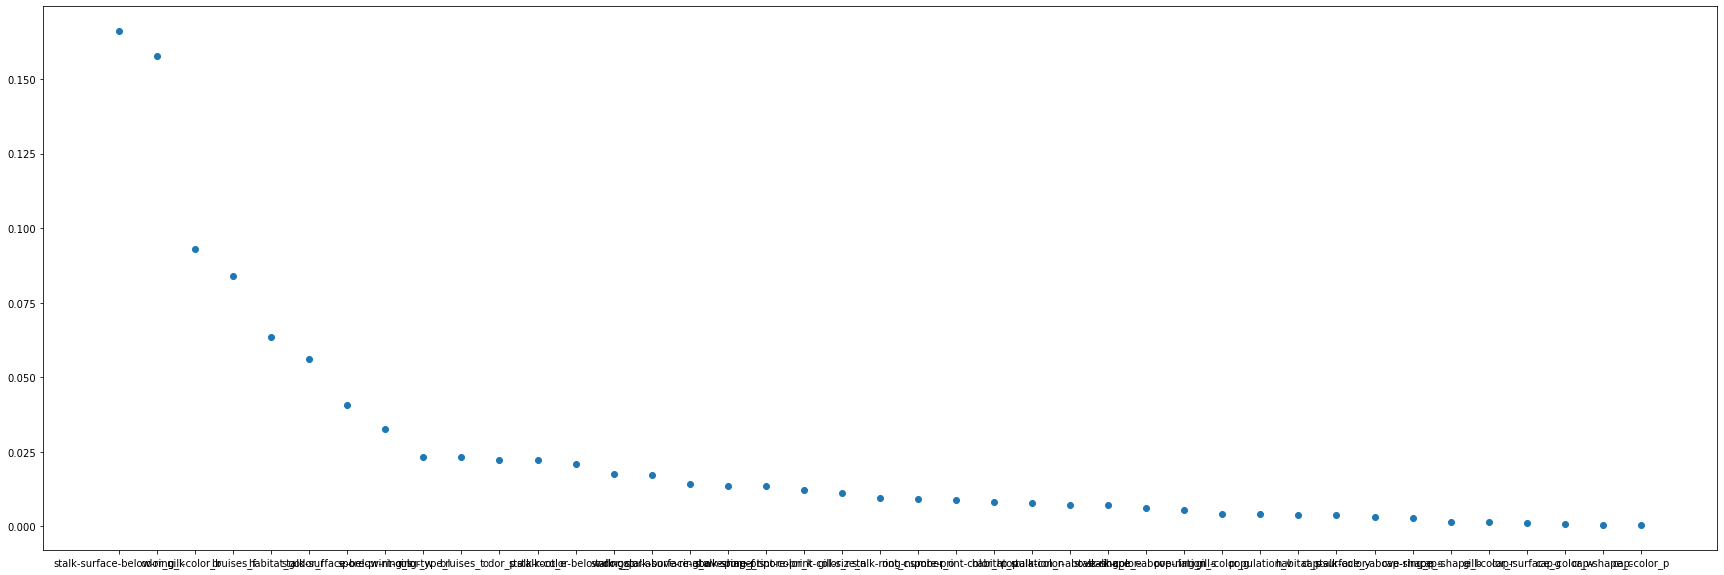

In [70]:
plt.figure(figsize=(30,10))
plt.plot(most_important_features, "o" )

In [71]:
z = df_columns.columns
x_columns = pd.DataFrame(x) 
proba = x_columns.columns
z[1] in proba[0]


True

In [72]:
feature_importances

,importance
stalk-surface-below-ring_k,0.166113
odor_n,0.157838
gill-color_b,0.093064
bruises_f,0.083805
habitat_g,0.063340
...,...
gill-color_n,0.000000
gill-color_k,0.000000
gill-color_h,0.000000
gill-color_e,0.000000


In [73]:
fi = pd.DataFrame(feature_importances).reset_index()
fi.columns = ["feature", "importance"]

In [74]:
odor = fi[fi["feature"].str.contains("odor")]
print(odor)

   feature  importance
1   odor_n    0.157838
5   odor_f    0.056042
10  odor_p    0.022277
13  odor_c    0.017366
76  odor_y    0.000000
77  odor_s    0.000000
78  odor_m    0.000000
79  odor_l    0.000000
80  odor_a    0.000000


In [75]:
for f in z:
    odor = fi[fi["feature"].str.contains(f)].importance.sum()
    print(f, odor)

class 0.0
cap-shape 0.004820517734877175
cap-surface 0.004842341282111593
cap-color 0.0010686705601340588
bruises 0.1069063257424175
odor 0.2535226120335246
gill-attachment 0.0
gill-spacing 0.0
gill-size 0.011232288325438534
gill-color 0.09847028536602345
stalk-shape 0.020700724056176734
stalk-root 0.031725610960953
stalk-surface-above-ring 0.014041242194414313
stalk-surface-below-ring 0.20671486003352998
stalk-color-above-ring 0.033589644340430304
stalk-color-below-ring 0.020783407154744613
veil-type 0.0
veil-color 0.0
ring-number 0.009051049371529975
ring-type 0.023157009706803566
spore-print-color 0.06680281863487478
population 0.017381583921284277
habitat 0.07518900858073158


In [76]:
for row in fi.itertuples():
    print(row.feature, row.importance)

stalk-surface-below-ring_k 0.1661130953221567
odor_n 0.15783800090977923
gill-color_b 0.09306372564760164
bruises_f 0.08380531182849765
habitat_g 0.06334023489570162
odor_f 0.05604202829866252
stalk-surface-below-ring_s 0.04060176471137328
spore-print-color_w 0.03251676767402212
ring-type_l 0.023157009706803566
bruises_t 0.023101013913919843
odor_p 0.02227701258084473
stalk-root_e 0.022162311508930783
stalk-color-below-ring_p 0.020783407154744613
odor_c 0.017365570244238134
stalk-color-above-ring_w 0.017203277988485016
stalk-surface-above-ring_f 0.014041242194414313
stalk-shape_t 0.013537892385304695
spore-print-color_k 0.013456822870491075
spore-print-color_r 0.012053863600679315
gill-size_n 0.011232288325438534
stalk-root_c 0.009563299452022216
ring-number_o 0.009051049371529975
spore-print-color_h 0.008775364489682276
habitat_u 0.0079721237745808
population_n 0.007892419930742986
stalk-color-above-ring_e 0.007203559055906798
stalk-shape_e 0.007162831670872037
stalk-color-above-ring_

In [77]:
#tworzenie widgetów

In [78]:
import ipywidgets as widgets
from IPython.display import display

In [79]:
widgets_cap_shape = widgets.Dropdown(options=["bell", "conical", "convex", "flat", "knobbed", "sunken"])
widgets_cap_surface = widgets.Dropdown(options=["fibrous", "grooves", "scaly", "smooth"])
widgets_cap_color = widgets.Dropdown(options=["brown", "buff", "cinnamon", "gray", "green", "pink", "purple", "red", "white", "yellow"])
widget_bruises = widgets.Dropdown(options=["Yes", "No"])
widget_odor = widgets.Dropdown(options=["almond", "anise", "creoote", "fishy", "foul", "musty", "none", "pungent", "spicy"])
widget_gill_attachment = widgets.Dropdown(options=["attached", "free"])
widget_gill_spacing = widgets.Dropdown(options=["close", "crowded"])
widget_gill_size = widgets.Dropdown(options=["broad", "narrow"])
widget_gill_color = widgets.Dropdown(options=["black", "brown", "buff", "chocolate", "gray", "green", "orange", "pink", "purple", "red", "white", "yellow"])
widget_stalk_shape = widgets.Dropdown(options=["enlarging", "tapering"])
widget_stalk_root = widgets.Dropdown(options=["bulbous", "club", "equal", "rooted", "missing"])
widget_stalk_surface_above_ring = widgets.Dropdown(options=["fibrous", "scaly", "silky", "smooth"])
widget_stalk_surface_below_ring = widgets.Dropdown(options=["fibrous", "scaly", "silky", "smooth"])
widget_stalk_color_above_ring = widgets.Dropdown(options=["brown", "buff", "cinnamon", "gray", "orange", "pink", "red", "white", "yellow"])
widget_stalk_color_below_ring = widgets.Dropdown(options=["brown", "buff", "cinnamon", "gray", "orange", "pink", "red", "white", "yellow"])
widget_veil_type = widgets.Dropdown(options=["parial"])
widget_veil_color = widgets.Dropdown(options=["brown", "orange", "white", "yellow"])
widget_ring_number = widgets.Dropdown(options=["none", "two"])
widget_ring_type = widgets.Dropdown(options=["evanescent", "flaring", "large", "none", "pendant"])
widget_spore_print_color = widgets.Dropdown(options=["black", "brown", "buff", "chocolate", "green", "orange", "purple", "white", "yellow"])
widget_population = widgets.Dropdown(options=["abundant", "clustered", "numerous", "scattered", "several", "solitary"])
widget_habitat = widgets.Dropdown(options=["grasses", "leaves", "meadows", "paths", "urban", "waste", "woods"])

In [ ]:
values = {
    "Cap Shape": widgets_cap_shape.value, 
    "Cap Surface": widgets_cap_surface.value, 
    "Cap Color": widgets_cap_color.value,
    "Bruises": widget_bruises.value,
    "Odor": widget_odor.value,
    "Gill_Attachment": widget_gill_attachment.value,
    "Gill_Spacing": widget_gill_spacing.value,
    "Gill_Size": widget_gill_size.value,
    "Gill_Color": widget_gill_color.value,
    "Stalk_Shape": widget_stalk_shape.value,
    "Stalk_Root": widget_stalk_root.value,
    "Stalk_Surface_Above_Ring": widget_stalk_surface_above_ring.value,
    "Stalk_Surface_Below_Ring": widget_stalk_surface_below_ring.value,
    "Stalk_Color_Above_Ring": widget_stalk_color_above_ring.value,
    "Stalk_Color_Below_Ring": widget_stalk_color_below_ring.value,
    "Veil_Type": widget_veil_type.value,
    "Veil_Color": widget_veil_color.value,
    "Ring_Number": widget_ring_number.value,
    "Ring_Type": widget_ring_type.value,
    "Spore_Print_Color": widget_spore_print_color.value,
    "Population": widget_population.value,
    "Habitat": widget_habitat.value,
    }

def widget_handler(Cap_Shape, Cap_Surface, Cap_Color, Bruises, Odor, Gill_Attachment, Gill_Spacing, Gill_Size, Gill_Color, Stalk_Shape, Stalk_Root, Stalk_Surface_Above_Ring, Stalk_Surface_Below_Ring, Stalk_Color_Above_Ring, Stalk_Color_Below_Ring, Veil_Type, Veil_Color, Ring_Number, Ring_Type, Spore_Print_Color, Population, Habitat):
    values["Cap Shape"] = Cap_Shape
    values["Cap Surface"] = Cap_Surface
    values["Cap Color"] = Cap_Color
    values["Bruises"] = Bruises
    values["Odor"] = Odor
    values["Gill_Attachment"] = Gill_Attachment
    values["Gill_Spacing"] = Gill_Spacing
    values["Gill_Size"] = Gill_Size
    values["Gill_Color"] = Gill_Color
    values["Stalk_Shape"] = Stalk_Shape
    values["Stalk_Root"] = Stalk_Root
    values["Stalk_Surface_Above_Ring"] = Stalk_Surface_Above_Ring
    values["Stalk_Surface_Below_Ring"] = Stalk_Surface_Below_Ring
    values["Stalk_Color_Above_Ring"] = Stalk_Color_Above_Ring
    values["Stalk_Color_Below_Ring"] = Stalk_Color_Below_Ring
    values["Veil_Type"] = Veil_Type
    values["Veil_Color"] = Veil_Color
    values["Ring_Number"] = Ring_Number
    values["Ring_Type"] = Ring_Type
    values["Spore_Print_Color"] = Spore_Print_Color
    values["Population"] = Population
    values["Habitat"] = Habitat

widgets.interact(
    widget_handler,
    Cap_Shape = widgets_cap_shape, 
    Cap_Surface = widgets_cap_surface, 
    Cap_Color = widgets_cap_color, 
    Bruises = widget_bruises, 
    Odor = widget_odor, 
    Gill_Attachment = widget_gill_attachment, 
    Gill_Spacing = widget_gill_spacing, 
    Gill_Size = widget_gill_size, 
    Gill_Color = widget_gill_color, 
    Stalk_Shape = widget_stalk_shape, 
    Stalk_Root = widget_stalk_root, 
    Stalk_Surface_Above_Ring = widget_stalk_surface_above_ring, 
    Stalk_Surface_Below_Ring = widget_stalk_surface_below_ring, 
    Stalk_Color_Above_Ring = widget_stalk_color_above_ring, 
    Stalk_Color_Below_Ring = widget_stalk_color_below_ring, 
    Veil_Type = widget_veil_type, 
    Veil_Color = widget_veil_color, 
    Ring_Number = widget_ring_number, 
    Ring_Type = widget_ring_type, 
    Spore_Print_Color = widget_spore_print_color, 
    Population = widget_population, 
    Habitat = widget_habitat)

In [80]:
run_button = widgets.Button(description = "Run")

def button_callback(button):
    print(values)
    

run_button.on_click(button_callback)

interactive(children=(Dropdown(description='Cap_Shape', options=('bell', 'conical', 'convex', 'flat', 'knobbed…

<function __main__.widget_handler(Cap_Shape, Cap_Surface, Cap_Color, Bruises)>

In [81]:
display(widgets_cap_shape, widgets_cap_surface, widgets_cap_color, widget_bruises, widget_odor, widget_gill_attachment, widget_gill_spacing, widget_gill_size, widget_gill_color, widget_stalk_shape, widget_stalk_root, widget_stalk_surface_above_ring, widget_stalk_surface_below_ring, widget_stalk_color_above_ring, widget_stalk_color_below_ring, widget_veil_type, widget_veil_color, widget_ring_number, widget_ring_type, widget_spore_print_color, widget_population, widget_habitat, run_button)

{'Cap Shape': 'bell', 'Cap Surface': 'fibrous', 'Cap Color': 'brown', 'Bruises': 'Yes'}


In [82]:
def mush_convertion_columns(chosen_values):

    index_cap_shape = ["bell", "conical", "convex", "flat", "knobbed", "sunken"]
    find_index_cap_shape = ['cap-shape_b', 'cap-shape_c', 'cap-shape_x', 'cap-shape_f', 'cap-shape_k', 'cap-shape_s']
    raz = find_index_cap_shape[index_cap_shape.index(chosen_values[0])]

    index_cap_surface = ["fibrous", "grooves", "scaly", "smooth"]
    find_index_cap_surface = ['cap-surface_f', 'cap-surface_g', 'cap-surface_y', 'cap-surface_s']
    dwa = find_index_cap_surface[index_cap_surface.index(chosen_values[1])]

    index_cap_color = ["brown", "buff", "cinnamon", "gray", "green", "pink", "purple", "red", "white", "yellow"]
    find_index_cap_color = ['cap-color_n', 'cap-color_b', 'cap-color_c', 'cap-color_g', 'cap-color_r', 'cap-color_p', 'cap-color_u', 'cap-color_e', 'cap-color_w', 'cap-color_y']
    trzy = find_index_cap_color[index_cap_color.index(chosen_values[2])]

    index_bruises = ["Yes", "No"]
    find_index_bruises = ['bruises_t', 'bruises_f']
    cztery = find_index_bruises[index_bruises.index(chosen_values[3])]

    index_odor = ["almond", "anise", "creoote", "fishy", "foul", "musty", "none", "pungent", "spicy"]
    find_index_odor = ['odor_a', 'odor_l', 'odor_c', 'odor_y', 'odor_f', 'odor_m', 'odor_n', 'odor_p', 'odor_s']
    piec = find_index_odor[index_odor.index(chosen_values[4])]

    index_gill_attachment = ["attached", "free"]
    find_index_gill_attachment = ['gill-attachment_a', 'gill-attachment_f']
    szesc = find_index_gill_attachment[index_gill_attachment.index(chosen_values[5])]

    index_gill_spacing = ["close", "crowded"]
    find_index_gill_spacing = ['gill-spacing_c', 'gill-spacing_w']
    siedem = find_index_gill_spacing[index_gill_spacing.index(chosen_values[6])]

    index_gill_size = ["broad", "narrow"]
    find_index_gill_size = ['gill-size_b', 'gill-size_n']
    osiem = find_index_gill_size[index_gill_size.index(chosen_values[7])]

    index_gill_color = ["black", "brown", "buff", "chocolate", "gray", "green", "orange", "pink", "purple", "red", "white", "yellow"]
    find_index_gill_color = ['gill-color_k', 'gill-color_n', 'gill-color_b', 'gill-color_h', 'gill-color_g', 'gill-color_r', 'gill-color_o', 'gill-color_p', 'gill-color_u', 'gill-color_e', 'gill-color_w', 'gill-color_y']
    dziewiec = find_index_gill_color[index_gill_color.index(chosen_values[8])]

    index_stalk_shape = ["enlarging", "tapering"]
    find_index_stalk_shape = ['stalk-shape_e', 'stalk-shape_t']
    dziesiec = find_index_stalk_shape[index_stalk_shape.index(chosen_values[9])]

    index_stalk_root = ["bulbous", "club", "equal", "rooted", "missing"]
    find_index_stalk_root = ['stalk-root_b', 'stalk-root_c', 'stalk-root_e', 'stalk-root_r', 'stalk-root_?']
    jedenascie = find_index_stalk_root[index_stalk_root.index(chosen_values[10])]

    index_stalk_surface_above_ring = ["fibrous", "scaly", "silky", "smooth"]
    find_index_stalk_surface_above_ring = ['stalk-surface-above-ring_f', 'stalk-surface-above-ring_y', 'stalk-surface-above-ring_k', 'stalk-surface-above-ring_s']
    dwanascie = find_index_stalk_surface_above_ring[index_stalk_surface_above_ring.index(chosen_values[11])]

    index_stalk_surface_below_ring = ["fibrous", "scaly", "silky", "smooth"]
    find_index_stalk_surface_below_ring = ['stalk-surface-below-ring_f', 'stalk-surface-below-ring_y', 'stalk-surface-below-ring_k', 'stalk-surface-below-ring_s']
    trzynascie = find_index_stalk_surface_below_ring[index_stalk_surface_below_ring.index(chosen_values[12])]

    index_stalk_color_above_ring = ["brown", "buff", "cinnamon", "gray", "orange", "pink", "red", "white", "yellow"]
    find_index_stalk_color_above_ring = ['stalk-color-above-ring_n', 'stalk-color-above-ring_b','stalk-color-above-ring_c', 'stalk-color-above-ring_g','stalk-color-above-ring_o', 'stalk-color-above-ring_p','stalk-color-above-ring_e', 'stalk-color-above-ring_w','stalk-color-above-ring_y']
    czernascie = find_index_stalk_color_above_ring[index_stalk_color_above_ring.index(chosen_values[13])]

    index_stalk_color_below_ring = ["brown", "buff", "cinnamon", "gray", "orange", "pink", "red", "white", "yellow"]
    find_index_stalk_color_below_ring = ['stalk-color-below-ring_n', 'stalk-color-below-ring_b','stalk-color-below-ring_c', 'stalk-color-below-ring_g','stalk-color-below-ring_o', 'stalk-color-below-ring_p','stalk-color-below-ring_e', 'stalk-color-below-ring_w','stalk-color-below-ring_y']
    pietnascie = find_index_stalk_color_below_ring[index_stalk_color_below_ring.index(chosen_values[14])]

    index_veil_type = ["parial"]
    find_index_veil_type = ['veil-type_p']
    szesnascie = find_index_veil_type[index_veil_type.index(chosen_values[15])]

    index_veil_color = ["brown", "orange", "white", "yellow"]
    find_index_veil_color = ['veil-color_n', 'veil-color_o', 'veil-color_w', 'veil-color_y']
    siedemnascie = find_index_veil_color[index_veil_color.index(chosen_values[16])]

    index_ring_number = ["none", "two"]
    find_index_ring_number = ['ring-number_n', 'ring-number_t']
    osiemnascie = find_index_ring_number[index_ring_number.index(chosen_values[17])]

    index_ring_type = ["evanescent", "flaring", "large", "none", "pendant"]
    find_index_ring_type = ['ring-type_e', 'ring-type_f', 'ring-type_l', 'ring-type_n', 'ring-type_p']
    dziewietnascie = find_index_ring_type[index_ring_type.index(chosen_values[18])]

    index_spore_print_color = ["black", "brown", "buff", "chocolate", "green", "orange", "purple", "white", "yellow"]
    find_index_spore_print_color = ['spore-print-color_k', 'spore-print-color_n', 'spore-print-color_b','spore-print-color_h', 'spore-print-color_r', 'spore-print-color_o','spore-print-color_u', 'spore-print-color_w', 'spore-print-color_y']
    dwadziescia = find_index_spore_print_color[index_spore_print_color.index(chosen_values[19])]

    index_population = ["abundant", "clustered", "numerous", "scattered", "several", "solitary"]
    find_index_population = ['population_a', 'population_c', 'population_n', 'population_s','population_v', 'population_y']
    dwadziesciajeden = find_index_population[index_population.index(chosen_values[20])]

    index_habitat = ["grasses", "leaves", "meadows", "paths", "urban", "waste", "woods"]
    find_index_habitat = ['habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u', 'habitat_w', 'habitat_d']
    dwadziesciadwa = find_index_habitat[index_habitat.index(chosen_values[21])]

    
    return [raz, dwa, trzy, cztery, piec, szesc, siedem, osiem, dziewiec, dziesiec, jedenascie, dwanascie, trzynascie, czernascie, pietnascie, szesnascie, siedemnascie, osiemnascie, dziewietnascie, dwadziescia, dwadziesciajeden, dwadziesciadwa]

In [ ]:
def predicted_values(empty_data, chosen_list): #funkcja przypisująca wartość 1 wcześniej wybranym przez nas kolumnom
    empty_data.loc[:, chosen_list] = 1
    return empty_data

In [ ]:
# przypisanie zmiennej by tworzyć pustą pojedyńczą tabelkę
zmienna = X_test

In [ ]:
empty_df = pd.DataFrame(zmienna.iloc[0]).transpose() #wybieranie jednego wiersza by mieć wszystkie kolumny używanego do analizy

In [ ]:
empty_df.iloc[0] = 0 
empty_df.reset_index().drop("index", axis=1, inplace=True) #przypisywanie tym kolumnom wartości 0 by móc wybranym dopisać 1

In [ ]:
dictionary_values = values.values() #wybór wartości słownika
dictionary_values = list(dictionary_values)

In [83]:
convertion = mush_convertion_columns(dictionary_values)

Dropdown(description='Cap_Shape', options=('bell', 'conical', 'convex', 'flat', 'knobbed', 'sunken'), value='b…

Dropdown(description='Cap_Surface', options=('fibrous', 'grooves', 'scaly', 'smooth'), value='fibrous')

Dropdown(description='Cap_Color', options=('brown', 'buff', 'cinnamon', 'gray', 'green', 'pink', 'purple', 're…

Dropdown(description='Bruises', options=('Yes', 'No'), value='Yes')

Button(description='Run', style=ButtonStyle())

In [ ]:
mush_pred = predicted_values(empty_df, convertion)
mush_pred

In [84]:
xgb_cl_1 = xgb.XGBClassifier( n_estimators=100,
                           max_depth=3,
                           use_label_encoder=False,
                           eval_metric='error'
                        )
xgb_cl_1.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [91]:
y_pred = xgb_cl_1.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  1.0


In [92]:
report_class = classification_report(y_test, y_pred)
print(report_class)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       791
           1       1.00      1.00      1.00       834

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



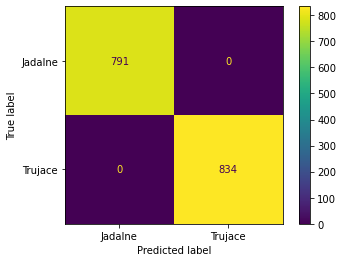

In [86]:
plot_confusion_matrix(xgb_cl_1,
                      X_test,
                      y_test,
                      values_format='d',
                      display_labels=["Jadalne", "Trujace"])

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

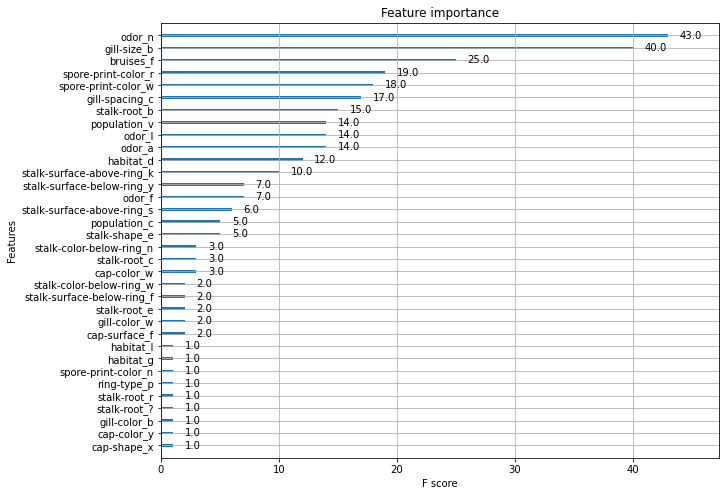

In [88]:
from matplotlib.pylab import rcParams
##set up the parameters
rcParams['figure.figsize'] = 10, 8

xgb.plot_importance(xgb_cl_1)

In [87]:
xgb_cl_2 = xgb.XGBClassifier(n_estimators=100,
                             seed=42,
                             objective='binary:logistic',
                             use_label_encoder=False,
                             eval_metric='aucpr'
                             )
xgb_cl_2.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='aucpr', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, ...)

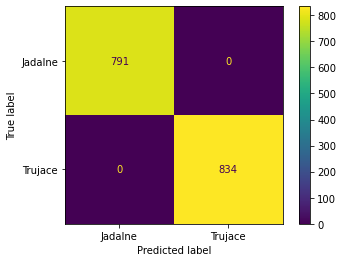

In [85]:
plot_confusion_matrix(xgb_cl_2,
                      X_test,
                      y_test,
                      values_format='d',
                      display_labels=["Jadalne", "Trujace"])